# Decision tree : CART (Classification And Regression Tree)

1. A supervised ML algorithm.
2. It works for both classification and regression problems.
3. It is the foundation of Random Forest.
4. Attractive becoz of interpretability. (easy to interpret)
5. The goal of decision tree is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.


**Decision Tree works by:**

1. split based on set impurity criteria.
2. stopping criteria.

**Advantages:**
1. Simple to understand and to interpret. Trees can be visualised.
2. Requires little data preparation. 
3. Able to handle both numerical and categorical data.
4. Possible to validate a model using statistical tests.
5. Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.
6. Able to handle multi-output problems.

**Disadvantages:**
1. Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
2. Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. *mitigation:* using decision trees within an ensemble.
3. It cannot guarantee to return the globally optimal decision tree. *mitigation:* Training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.
4. Decision tree learners create biased trees if some classes dominate. *recommended:* To balance the dataset prior to fitting with the decision tree.

## Training Decision Tree using scikit-learn:

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set_style('whitegrid')

In [2]:
print(np.__version__)
print(pd.__version__)
print(matplotlib.__version__)
print(sns.__version__)
print(sklearn.__version__)

1.17.4
0.25.3
3.2.1
0.10.0
0.22.1


In [3]:
from sklearn import tree

In [4]:
x = [[0,0],[1,2]]
y = [0,1]

In [5]:
clf = tree.DecisionTreeClassifier()

In [6]:
clf.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [7]:
clf.predict([[2,2]])

array([1])

In [8]:
clf.predict_proba([[2,2]])

array([[0., 1.]])

In [9]:
clf.predict([[0.4,1.2]])

array([0])

In [10]:
clf.predict_proba([[0.4,1.2]])

array([[1., 0.]])

In [11]:
clf.predict_proba([[0.,0.2]])

array([[1., 0.]])

#### Decision Tree classifier are capable of both binary and multiclass classification.

## Using iris dataset:

In [12]:
from sklearn.datasets import load_iris

In [13]:
data = load_iris()

In [14]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [15]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
x = data.data[:,2:]
y = data.target

In [17]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
clf = tree.DecisionTreeClassifier(random_state = 42)

In [19]:
clf.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [20]:
# Export_graphviz


#from sklearn.tree import export_grapgviz #... installation problem _________check later_________

In [21]:
import graphviz

In [22]:
dot_data = tree.export_graphviz(clf,out_file = None,
                                feature_names = data.feature_names[2:],
                              class_names = data.target_names,
                               rounded = True,
                               filled = True)

In [23]:
graph = graphviz.Source(dot_data)

In [24]:
#graph  #.........error........installation problem _________check later________

## Visualizing Boundary:

In [25]:
df = sns.load_dataset('iris')
colx = ['petal_length','petal_width'] 
x = df.loc[:,colx] # get independent variable
label = {'setosa' : 0,
        'versicolor' : 1,
        'virginica' : 2}

df['tmp'] = df['species'].map(label)
y = df['tmp']

clf = tree.DecisionTreeClassifier(random_state = 42)
clf.fit(x,y)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [26]:
xv = x.values.reshape(-1,1)
h = 0.02
xmin,xmax = xv.min(),xv.max() + 1
ymin, ymax = y.min(), y.max() + 1
xx,yy = np.meshgrid(np.arange(xmin,xmax,h),np.arange(ymin,ymax,h))

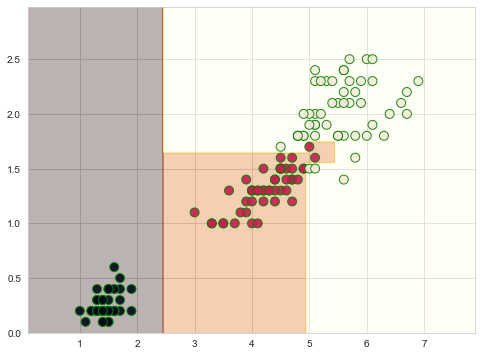

In [27]:
z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize = (8,6))
ax = plt.contourf(xx,yy,z,cmap = 'afmhot',alpha = 0.3)
plt.scatter(x.values[:,0],x.values[:,1],c=y,s = 80, alpha = 0.9,edgecolors = 'g')

## DecisionTree Algorithm:
What are all the various decision tree algorithms and how do they differ from each other? Which one is implemented in scikit-learn?

> **ID3 (Iterative Dichotomiser 3)** was developed in 1986 by Ross Quinlan. The algorithm creates a multiway tree, finding for each node (i.e. in a greedy manner) the categorical feature that will yield the largest information gain for categorical targets. Trees are grown to their maximum size and then a pruning step is usually applied to improve the ability of the tree to generalise to unseen data.

> **C4.5** is the successor to ID3 and removed the restriction that features must be categorical by dynamically defining a discrete attribute (based on numerical variables) that partitions the continuous attribute value into a discrete set of intervals. C4.5 converts the trained trees (i.e. the output of the ID3 algorithm) into sets of if-then rules. These accuracy of each rule is then evaluated to determine the order in which they should be applied. Pruning is done by removing a rule’s precondition if the accuracy of the rule improves without it.

> **C5.0** is Quinlan’s latest version release under a proprietary license. It uses less memory and builds smaller rulesets than C4.5 while being more accurate.

> **CART (Classification and Regression Trees)** is very similar to C4.5, but it differs in that it supports numerical target variables (regression) and does not compute rule sets. CART constructs binary trees using the feature and threshold that yield the largest information gain at each node.

## Gini Impurity:

A measure of purity/variability of categorical data.

**Gini Impurity Vs Gini Coefficients:**
1. They are not equivalent.
2. Gini Impurity is a measure of classification , applies in multiclass classification context.
3. Gini Coeff. applies to binary classification and requires classifier that can in some way rank examples according to the likelihood of being in +ve class.

**Key Points:**
> A pure node (samples belongs to same class) will have gini coeff. is 0.

> As the variations (heterogeneous classes) increases, gini coeff. increases and approches to 1.

\begin{equation*}
Gini Coeff. = 1- \sum p_{j} ^{2} 
\end{equation*}
where , p is probability (based on frequency table).


**In Classifier Initialization:**
1. set **criteria  = gini** , (default)----> to use gini impurity index.
2. set **criteria  = entropy** ----> to use information gain.

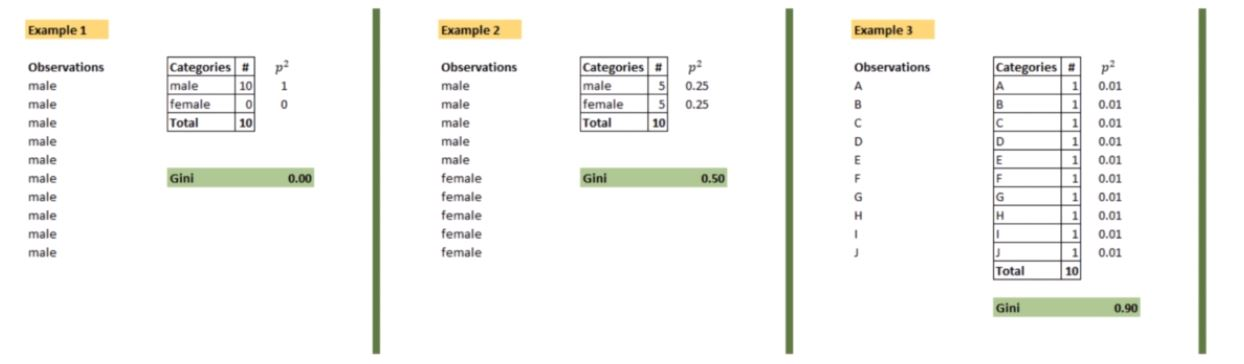

In [28]:
from IPython.display import Image
Image("D:\\PycharmProjects\\UdemyML\\treeimg.jpg",width = 1000)

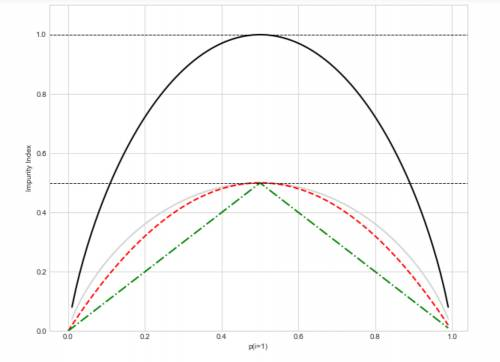

In [29]:
from IPython.display import Image
Image("D:\\PycharmProjects\\UdemyML\\treeimg2.jpg",width = 500)

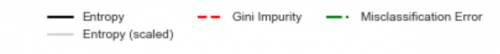

In [30]:
Image("D:\\PycharmProjects\\UdemyML\\treeimg2x.jpg",width = 500)

## Information Gain:

1. Expected reduction in entropy caused by splitting.
2. keep splitting untill you obtain as close to homogeneous class as possible.

## Decision Tree Regressor:

In [31]:
from sklearn import tree

In [32]:
x = [[0,0],[3,3]]
y = [0.75,3]

In [33]:
reg = tree.DecisionTreeRegressor(random_state = 42)

In [34]:
reg.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [35]:
reg.predict([[1.5,1.5]])

array([0.75])

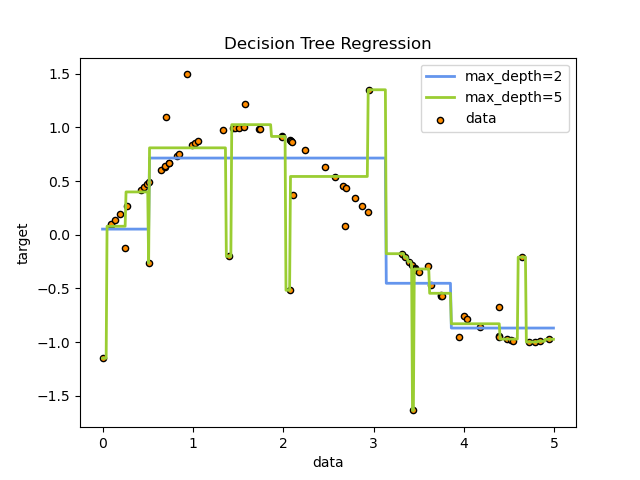

In [36]:
Image("D:\\PycharmProjects\\UdemyML\\treeimg3.png",width = 600)

**we will select tree with max_depth = 2 as it shows good fiting (not overfitted) over the data points.**

**tree with max_depth = 5 is showing the overfitted (not generalized) model. To reduce the effect of overfitting in this tree we can use regularization.** 

## Modeling end-to-end with Decision Tree:

In [37]:
from sklearn.datasets import make_moons

In [38]:
x,y = make_moons(n_samples = 1000, noise = 0.5 , random_state = 42)

In [39]:
x

array([[-0.29225715,  0.74829907],
       [ 1.47454855, -0.1110859 ],
       [ 0.57855623,  0.71871212],
       ...,
       [ 1.85765499, -0.6706497 ],
       [-1.15634187, -0.25010007],
       [ 0.73475491,  0.68731137]])

In [40]:
x.shape

(1000, 2)

In [41]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [42]:
y.shape

(1000,)

In [43]:
clf1 = tree.DecisionTreeClassifier(random_state = 42)
clf2 = tree.DecisionTreeClassifier(min_samples_leaf = 10 , random_state = 42) # with regularization

In [44]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 42 )

In [46]:
param = {'min_samples_leaf': list(range(5,20))} # tuning only one parameter


#param = {'min_samples_leaf' : list(range(5,20)),
#         'max_leaf_nodes'  :  list(range(5,20)),
 #        'min_samples_split' : [2,3,4],
 #        'criterion':['gini','entropy']}

In [47]:
gridsearch = GridSearchCV(tree.DecisionTreeClassifier(random_state = 42), param, n_jobs = -1, verbose = 1)

In [48]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    1.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    1.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'min_samples_leaf': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14

In [49]:
gridsearch.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=16, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
y_pred  = gridsearch.predict(x_test)

In [52]:
accuracy_score(y_test,y_pred) # accuracy of gridsearch model

0.83

In [53]:
clf1.fit(x_train,y_train)
y_pred1  = clf1.predict(x_test)
print(accuracy_score(y_test,y_pred1))  # accuracy of clf1 model

0.74


In [54]:
clf2.fit(x_train,y_train)
y_pred2  = clf2.predict(x_test)
print(accuracy_score(y_test,y_pred2))  # accuracy of clf2 model

0.84


In [55]:
clf1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

## Some Tips on practical use:

1. Decision trees tend to overfit on data with a large number of features. Getting the right ratio of samples to number of features is important, since a tree with few samples in high dimensional space is very likely to overfit.

2. Consider performing **dimensionality reduction** (PCA, ICA, or Feature selection) beforehand.

3. Visualize your tree as you are training by using the export function. Use max_depth=3 as an initial tree depth.

4. Use **max_depth** to control the size of the tree to prevent overfitting.

5. Tune **min_samples_split** or **min_samples_leaf** to control the no. of samples at leaf node. A very small number will usually mean the tree will overfit, whereas a large number will prevent the tree from learning the data.

6. Balance your dataset before training to prevent the tree from being biased toward the classes that are dominant. Class balancing can be done by:

    > sampling an equal number of samples from each class.
    
    > normalizing the sum of the sample weights (sample_weight) for each class to the same value. 
    